In [1]:
import sys
sys.path.append('../')
from src.evaluation.goal_evaluator import GoalEvaluator
from src.extraction.extractor import generate_description, generate_actors, generate_high_level_goals, generate_low_level_goals
from src.mapping.APIs_mapping import generate_mapping_apis_goals, print_api_goal_mapping
from src.self_critique.refine_response import EvalMode, generate_response_with_reflection
from src.utils import get_api_list_from_swagger
from src.examples.shot_learning import ShotPromptingMode

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Luca\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Luca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Luca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
c:\Users\Luca\Desktop\POLITO\LargeLenguageModels\Project\LLM_Agent-Goal_Oriented_API_Alignement\notebook\..\src\examples\shot_learning.py:220: SyntaxWarning: invalid escape sequence '\{'
  example2_map = """
c:\Users\Luca\Desktop\POLITO\LargeLenguageModels\Project\LLM_Agent-Goal_Oriented_API_Alignement\notebook\..\src\examples\shot_learning.py:239: SyntaxWarning: invalid escape sequ

### Choose the project among the available ones

In [2]:
from groundtruth import GENOME, GESTAO_HOSPITAL
GROUNDTRUTH = GENOME

# Experiments

In [3]:
SHOTS_NUMBER = ShotPromptingMode.FEW_SHOT

### Description Generation

In [4]:
print("Description STARTING...")
description = generate_description(GROUNDTRUTH["link-readme"])
print("Description DONE...")
print(description)

Description STARTING...
Description DONE...
description='Genome Nexus is a resource designed for the rapid, automated, and high-throughput annotation and interpretation of genetic variants in cancer. It consolidates information from various databases that facilitate the conversion of DNA changes into protein alterations, predict the functional impacts of protein mutations, and provide insights on mutation frequencies and clinical actionability. The project aims to streamline the process of understanding genetic variants, making it a valuable tool for researchers and professionals in genomics and personalized medicine.'


### Actors Extraction

In [5]:
actors, actors_score, actors_critique = generate_response_with_reflection(
    "Actors",
    generate_actors,
    define_args=description,
    eval_mode=EvalMode.ACTORS,
    eval_args=description,
    shotPromptingMode=SHOTS_NUMBER,
    max_attempts=3
)

Actors STARTING... (attempt 1)
No feedback provided!
Actors DONE...
actors=[Actor(name='Researchers', description='Individuals studying genetic variants and their implications in cancer.'), Actor(name='Clinical Professionals', description='Healthcare providers using genomic data for patient care and personalized medicine.'), Actor(name='Bioinformaticians', description='Specialists who analyze and interpret genomic data.')]
Evaluation for Actors STARTING...
Evaluation for Actors DONE...
Score: 8
Critique: The actors identified are relevant to the software description, but the list may not be exhaustive. For instance, there is no mention of database administrators or curators who might be responsible for maintaining the various databases that Genome Nexus consolidates information from. Additionally, the role of 'Bioinformaticians' might overlap with 'Researchers', as both could be involved in analyzing and interpreting genomic data, potentially leading to redundancy in the actor list.
Sa

### High Level Goals Extraction

In [6]:
highLevelGoals, HL_score, HL_critique = generate_response_with_reflection(
    "High Level Goals",
    generate_high_level_goals,
    define_args=(description, actors),
    eval_mode=EvalMode.HIGH_LEVEL,
    shotPromptingMode=SHOTS_NUMBER,
    eval_args=(description, actors)
)

High Level Goals STARTING... (attempt 1)
No feedback provided!
This is the provided sys prompt:  You are a helpful assistant expert in software engineering tasks You're tasked with extracting high level goals from a software description for each provided actor that is expected to interact with the software. MUST focus only on functional requirements and ignore non-functional requirements. Focus only on requirements that benefit the end users of the software.
High Level Goals DONE...
goals=[HighLevelGoal(name='Automated Annotation', description='Enable researchers to rapidly and automatically annotate genetic variants associated with cancer.', actor=Actor(name='Researchers', description='Individuals studying genetic variants and their implications in cancer.')), HighLevelGoal(name='Clinical Decision Support', description='Provide clinical professionals with actionable insights derived from genomic data to support patient care and personalized medicine.', actor=Actor(name='Clinical Profe

### Low Level Goals Extraction

In [7]:
lowLevelGoals, LL_score, LL_critique = generate_response_with_reflection(
    "Low Level Goals",
    generate_low_level_goals,
    define_args=(highLevelGoals),
    eval_mode=EvalMode.LOW_LEVEL,
    shotPromptingMode=SHOTS_NUMBER,
    eval_args=(description, actors, highLevelGoals)
)

Low Level Goals STARTING... (attempt 1)
No feedback provided!
This is the provided sys prompt:  You are a helpful assistant expert in software engineering tasksElicit low-level goals for a specific stakeholder in a software project  The low-level goals that you create MUST be structured to match against a set of API calls. Don't be too generic, for example, avoid goals like 'make the software fast', 'develop a web interface' etc.Each low-level goal MUST be phrased as an interaction with the system that could be implemented via an API call.Avoid generic goals like 'Access genetic data'. Instead, break them down into atomic actions linked to system capabilities.
Low Level Goals DONE...
low_level_goals=[LowLevelGoal(name='Enable researchers to upload genetic variant data for annotation', description='Allow researchers to submit genetic variants that need to be annotated automatically.', high_level_associated=HighLevelGoal(name='Automated Annotation', description='Enable researchers to rap

### APIs Extraction from Swagger

In [8]:
print("API List STARTING...")
apiList = get_api_list_from_swagger(GROUNDTRUTH["swagger"])
print("API List DONE...")
print(apiList)

API List STARTING...
API List DONE...
[API(api_name='fetchVariantAnnotationPOST', api_path='/annotation', description='Retrieves VEP annotation for the provided list of variants', request_type='post'), API(api_name='fetchVariantAnnotationByIdPOST', api_path='/annotation/dbsnp/', description='Retrieves VEP annotation for the provided list of dbSNP ids', request_type='post'), API(api_name='fetchVariantAnnotationByIdGET', api_path='/annotation/dbsnp/{variantId}', description='Retrieves VEP annotation for the give dbSNP id', request_type='get'), API(api_name='fetchVariantAnnotationByGenomicLocationPOST', api_path='/annotation/genomic', description='Retrieves VEP annotation for the provided list of genomic locations', request_type='post'), API(api_name='fetchVariantAnnotationByGenomicLocationGET', api_path='/annotation/genomic/{genomicLocation}', description='Retrieves VEP annotation for the provided genomic location', request_type='get'), API(api_name='fetchVariantAnnotationGET', api_path=

### APIs Mapping to Low Level Goals

In [9]:
print("Mapping STARTING...")
mappings = generate_mapping_apis_goals(lowLevelGoals, apiList)
print("Mapping DONE")

Mapping STARTING...
hlg name:  Automated Annotation
Goal name:  Enable researchers to upload genetic variant data for annotation
Goal description:  Allow researchers to submit genetic variants that need to be annotated automatically.
APIs:  fetchVariantAnnotationPOST

hlg name:  Automated Annotation
Goal name:  Retrieve automatic annotations for submitted genetic variants
Goal description:  Provide researchers with the ability to get automated annotations after submission of genetic variant data.
APIs:  fetchVariantAnnotationPOST, fetchVariantAnnotationByIdPOST, fetchVariantAnnotationByGenomicLocationPOST

hlg name:  Clinical Decision Support
Goal name:  Generate actionable insights from genomic data for patient cases
Goal description:  Allow clinical professionals to analyze genomic data and derive actionable insights for patient care.
APIs:  fetchVariantAnnotationPOST, fetchVariantAnnotationByGenomicLocationPOST, fetchCanonicalEnsemblGeneIdByEntrezGeneIdsPOST

hlg name:  Clinical Dec

In [10]:
print(mappings[0].low_level_goal.high_level_associated.name)

Automated Annotation


### Mapping Table

In [11]:
print_api_goal_mapping(mappings)

╒═══════════════════════════════════╤════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ High-Level Goal name              │ Low-Level Goal name                                                │ Low-Level Goal description                                                                                                        │ Mapped APIs                                                                                                                                 │
╞═══════════════════════════════════╪════════════════════════════════════════════════════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪

# Evaluation

### Evaluation: Extracted High Level Goals 

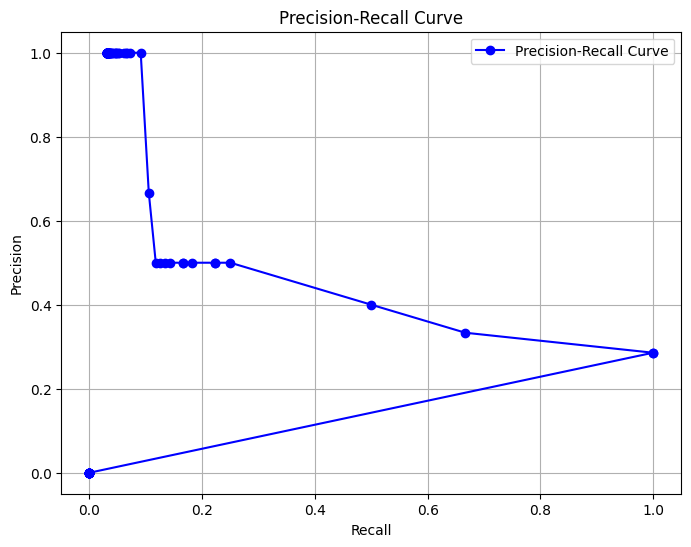

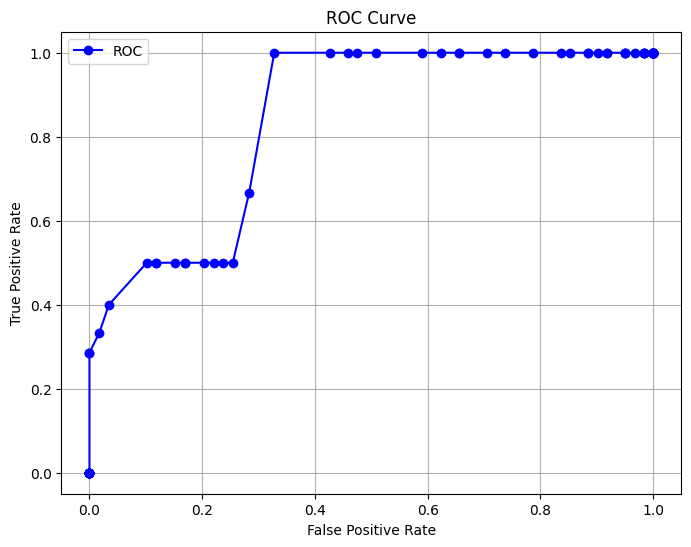

High Level ROC AUC: 0.84437460159981
High Level Precision Recall Curve AUC: 0.31019979740982967


In [12]:
# List of high-level goals 
generated_goals = [goal.description for goal in highLevelGoals.goals]
manual_goals = GROUNDTRUTH["highLevelGoals"]

evaluator = GoalEvaluator(preprocess = True)

auc_roc, auc_prec_rec = evaluator.print_roc_prec_rec_curve(generated_goals, manual_goals)
print("High Level ROC AUC:", auc_roc)
print("High Level Precision Recall Curve AUC:", auc_prec_rec)


### Evaluation: Extracted Low Level Goals 

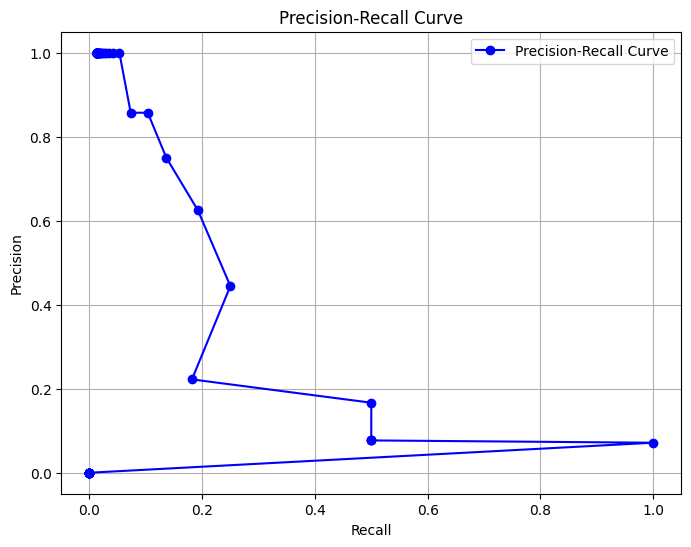

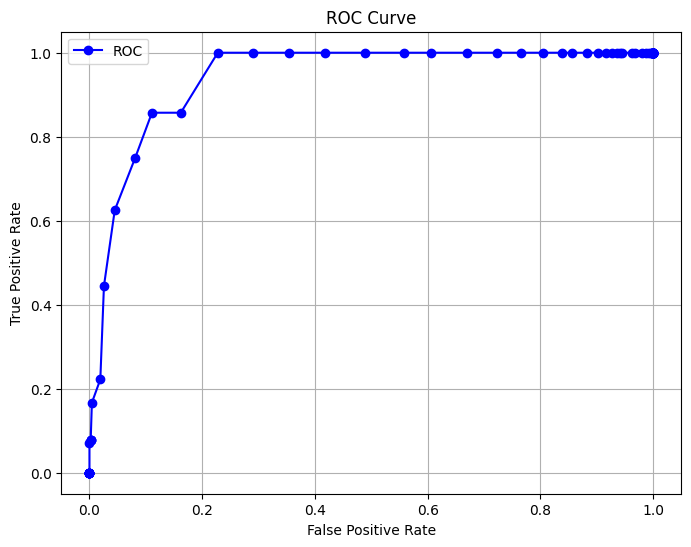

Low Level Goals ROC AUC: 0.9416765886723754
Low Level Goals Precision Recall Curve AUC: 0.2339648801978694


In [13]:
# List of low-level goals 
generated_low_level_goals = [goal.description for goal in lowLevelGoals.low_level_goals]

manual_low_level_goals = GROUNDTRUTH["lowLevelGoals"]

evaluator_low_level = GoalEvaluator(preprocess = True)

auc_roc, auc_prec_rec = evaluator_low_level.print_roc_prec_rec_curve(generated_low_level_goals, manual_low_level_goals)
print("Low Level Goals ROC AUC:", auc_roc)
print("Low Level Goals Precision Recall Curve AUC:", auc_prec_rec)

### Evaluation: Extracted Actors 

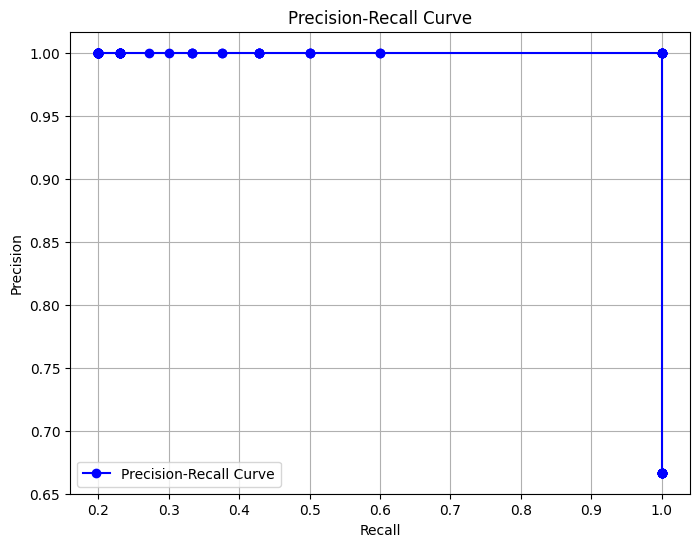

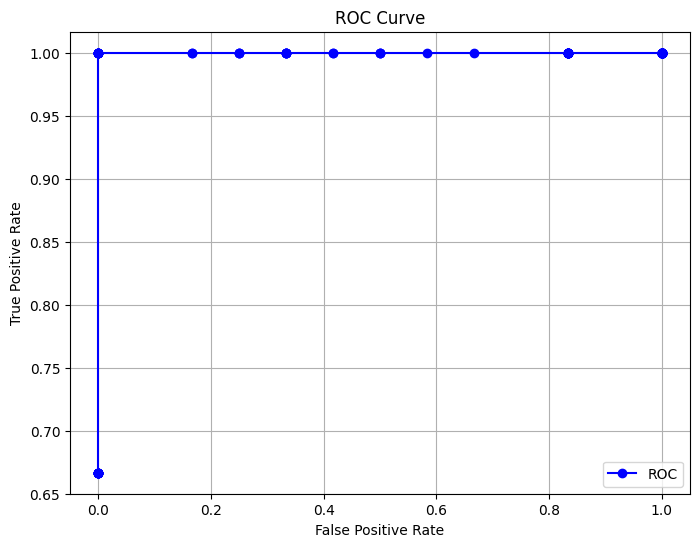

Actors ROC AUC: 0.9999999995833333
Actors Precision Recall Curve AUC: 0.33333333308333335


In [ ]:
# List of actors
generated_actors = [actor.name for actor in actors.actors]
manual_actors = GROUNDTRUTH["actors"]

evaluator = GoalEvaluator(preprocess = True)

auc_roc, auc_prec_rec = evaluator.print_roc_prec_rec_curve(generated_actors, manual_actors)
print("Actors ROC AUC:", auc_roc)
print("Actors Precision Recall Curve AUC:", auc_prec_rec)